<a href="https://colab.research.google.com/github/LeandroCoelhos/BeeData/blob/main/02.life_expectancy/life_expectancy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leandro Coelho <br>
27/05/2023 <br>

<b> BeeData - Life Expectancy </b>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

import time
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/BeeData/main/02.life_expectancy/Life%20Expectancy%20Data.csv')

# Entendendo os dados:


## 

<hr>
Country - cidade
<hr>
Year - Ano
<hr>
Status -  Estado Desenvolvido ou Em Desenvolvimento
Developing83%
Developed17%
<hr>
Life expectancy - Expectativa de vida na idade
<hr>
Adult Mortality - Taxas de mortalidade adulta de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes)
<hr>
infant deaths - Número de óbitos infantis por 1.000 habitantes
<hr>
Alcohol - Álcool, consumo registrado per capita (15+) (em litros de álcool puro)
<hr>
percentage expenditure - Gastos com saúde como porcentagem do Produto Interno Bruto per capita (%)
<hr>
Hepatitis B - 
Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%)
<hr>
Measles - 
Sarampo - número de casos notificados por 1000 habitantes
<hr>
BMI - Índice de Massa Corporal Médio de toda a população
<hr>
under-five deaths - Número de mortes de menores de cinco anos por 1000 habitantes
<hr>
Polio - Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)
<hr>
Total expenditure - Gastos do governo geral com saúde como porcentagem do gasto total do governo (%)
<hr>
Diphtheria - Cobertura vacinal contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%)
<hr>
HIV/AIDS - Mortes por 1 000 nascidos vivos HIV/AIDS (0-4 anos)
<hr>
GDP - Produto Interno Bruto per capita (em USD)
<hr>
Population - População do país
<hr>
thinness 1-19 years - Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%) (% ) 
<hr>
thinness 5-9 years - 
Prevalência de magreza em crianças de 5 a 9 anos (%)
<hr>
Income composition of resources - Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1)
<hr>
Schooling - Número de anos de escolaridade (anos)
<hr>


In [ ]:
#remove espaços no começo e fim do nome
df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns=lambda x: x.replace(' ', '_').lower())
df = df.rename(columns=lambda x: x.replace('-', '_').lower())
df.columns

In [ ]:
df = df.rename(columns={'country':'pais', 'year':'ano', 'status':'pais_desenvolvido', 'life_expectancy':'expectativa_vida', 'adult_mortality':'taxa_mortalidade_adul',
       'infant_deaths':'num_obitos_infantil', 'alcohol':'consumo_alcool_ltrs', 'percentage_expenditure':'porc_gasto_saude_pib', 'hepatitis_b':'porc_vacina_hepatitis_b',
       'measles':'num_casos_sarampo', 'bmi':'imc', 'under_five_deaths':'num_obitos_5anos', 'total_expenditure':'porc_gasto_saude_geral',
       'diphtheria':'porc_vacina_tetano', 'hiv/aids':'num_mortes_hiv_infant', 'gdp':'pib', 'population':'populacao', 'thinness__1_19_years':'porc_magreza_adolec',
       'thinness_5_9_years':'porc_magreza_crianc', 'income_composition_of_resources':'idh', 'schooling':'escolaridade'})

In [ ]:
df.info()

In [ ]:
cols=['pais', 'ano', 'pais_desenvolvido',  'taxa_mortalidade_adul','num_obitos_infantil','num_obitos_5anos','num_mortes_hiv_infant','porc_magreza_adolec','porc_magreza_crianc','num_casos_sarampo','porc_vacina_hepatitis_b', 'porc_vacina_tetano','polio',
         'imc','porc_gasto_saude_pib','porc_gasto_saude_geral', 'pib','populacao','idh', 'escolaridade','consumo_alcool_ltrs','expectativa_vida']
df = df[cols]
df.info()

In [ ]:
df = df.dropna(subset='expectativa_vida').reset_index(drop=True)
df['pais_desenvolvido'] = df.pais_desenvolvido.map({'Developed':1, 'Developing':0})
df

# Separando em Treino e Teste

In [ ]:
# convenção ser 20% teste
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train.shape, df_test.shape

# EDA

- nem todos paises estão no conjunto de teste
- nem todos os anos temos informações dos paises
- sabemos que a saude e o pais se desenvolve anualmente, é esperado que a expectativa dos paises suba (Factfulness)
- 

In [ ]:
cols = df_train.columns

for col in cols:
  print("Coluna: ",col)
  print(df_train[col].value_counts(dropna=False), "\n")

In [ ]:
df_train.isnull().mean().sort_values(ascending=False)

In [ ]:
fil = df_train.porc_vacina_hepatitis_b.isna()
df_train[fil].isnull().mean().sort_values(ascending=False)

In [ ]:
#msno.matrix(df_train, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False)

<ipython-input-67-97cec8e5dad0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


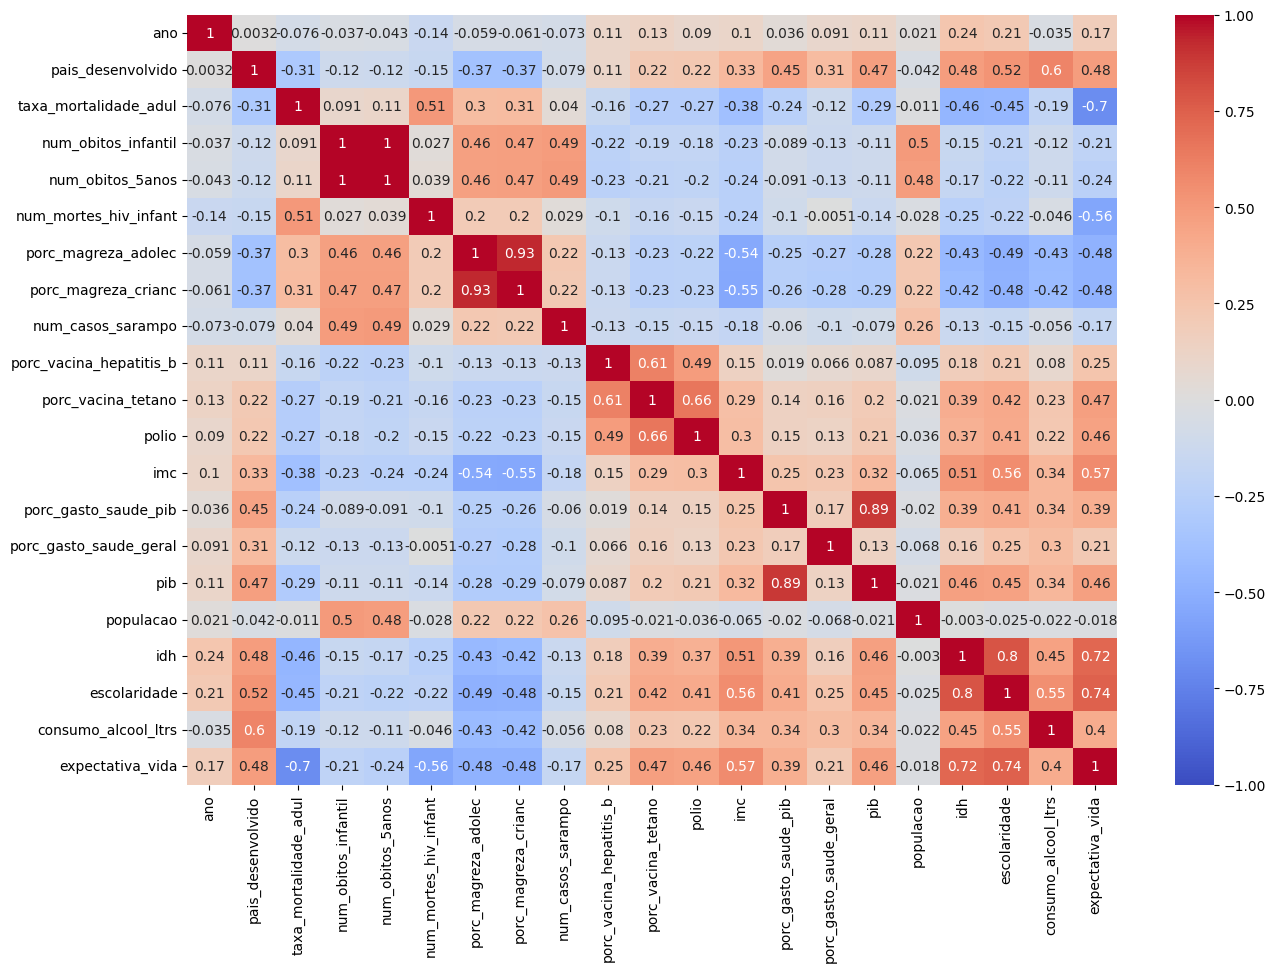

In [67]:
#Pearson
plt.figure(figsize=(15,10))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

Index(['pais', 'ano', 'pais_desenvolvido', 'taxa_mortalidade_adul',
       'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant',
       'porc_magreza_adolec', 'porc_magreza_crianc', 'num_casos_sarampo',
       'porc_vacina_hepatitis_b', 'porc_vacina_tetano', 'polio', 'imc',
       'porc_gasto_saude_pib', 'porc_gasto_saude_geral', 'pib', 'populacao',
       'idh', 'escolaridade', 'consumo_alcool_ltrs', 'expectativa_vida'],
      dtype='object')

<ipython-input-66-1eb4442924ea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr('spearman')


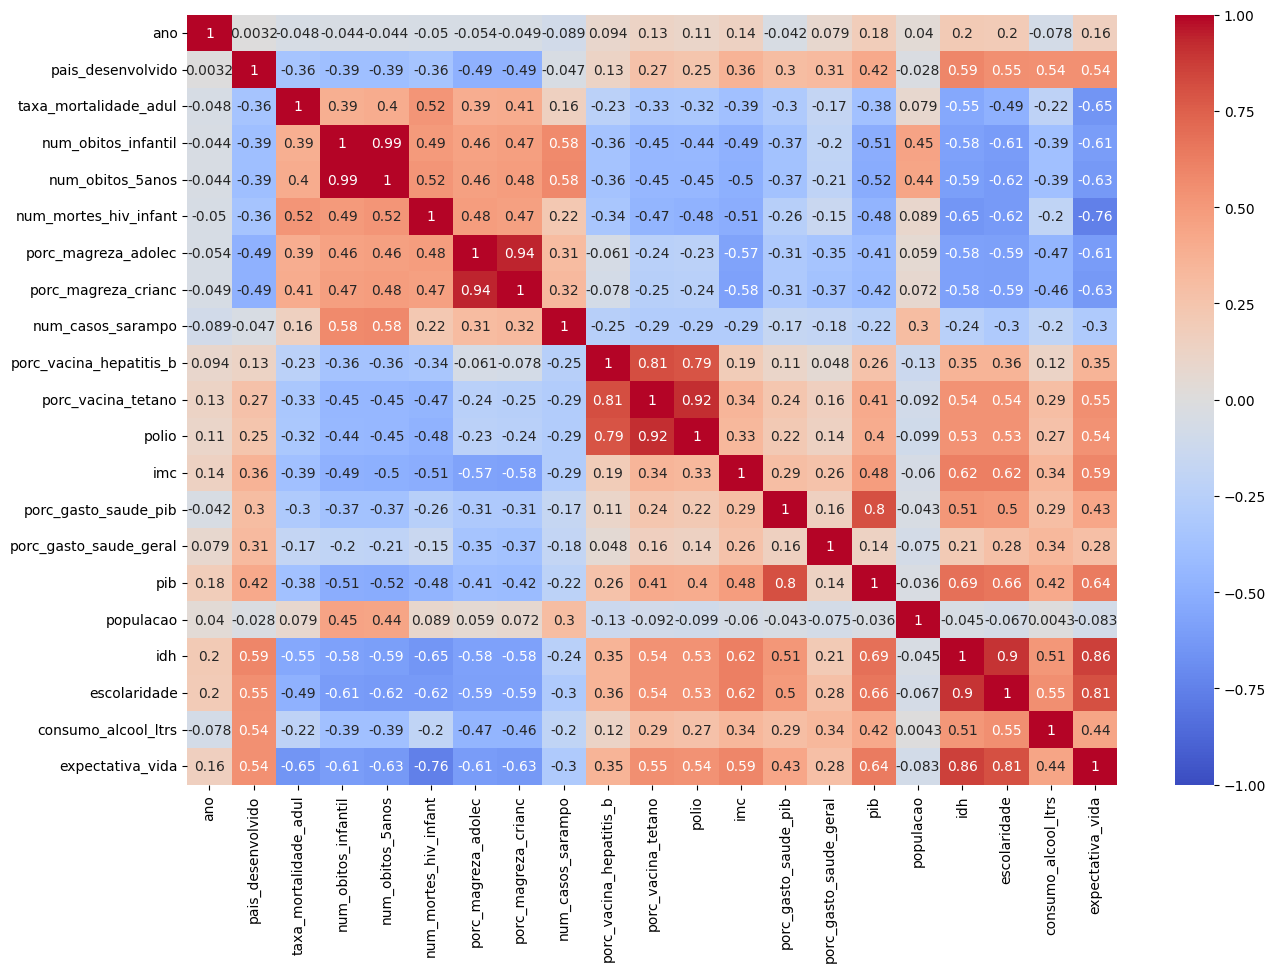

In [66]:
#spearman
plt.figure(figsize=(15,10))
corr_matrix = df_train.corr('spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

In [ ]:
sns.set_style('darkgrid')
#sns.set_palette('RdYlBu')
sns.set_context('paper')

In [ ]:
a = df_train.sample(10)
for col in cols:
  plt.figure(figsize=(12,8))
  sns.histplot(df_train, x=col, hue='pais_desenvolvido', bins=50, shrink=0.8)
  plt.title('Contagem - ' + col)
  plt.xticks(rotation=90, ha='right')
  plt.show()

In [ ]:
'''sns.pairplot(df_train, dropna=False)
plt.show()'''

# MVP
Todas as Features com fill na 0

## Avaliação do Modelo

In [ ]:
def separacao_treino_teste(df_treino, df_teste, colunas):
  x_treino = df_treino[colunas].fillna(0)
  y_treino = df_treino['expectativa_vida']
  x_teste = df_teste[colunas].fillna(0)
  y_teste = df_teste['expectativa_vida']
  return x_treino, y_treino, x_teste, y_teste

In [145]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def escalar_dados(df_treino, df_teste):
  sc = StandardScaler()
  cols = df_treino.columns
  for col in cols:
    df_treino[col] = sc.fit_transform(df_treino[[col]])
    df_teste[col] = sc.transform(df_teste[[col]])
  return df_treino, df_teste

def avaliacao(x_treino, y_treino, x_teste, y_teste ):
  print('Escalonar os dados...')
  x_treino, x_teste = escalar_dados(x_treino, x_teste)
  
  reg = LinearRegression()
  print('Avaliando Regressão Lienar...')
  mol_reg = cross_val_score(reg, x_treino, y_treino, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
  print('Treinando Modelo Final...')
  reg_test = LinearRegression()
  reg_test.fit(x_treino, y_treino)
  pred = reg_test.predict(x_teste)
  metrica = mean_squared_error(pred, y_teste)
  print('Treino - Score da Regressão Linear - ', -mol_reg.mean())
  print('Teste - Score da Regressão Linear - ', metrica)
  return reg_test

In [143]:
colunas = ['ano','pais_desenvolvido',  'taxa_mortalidade_adul', 'num_obitos_infantil', 'consumo_alcool_ltrs',
       'porc_gasto_saude_pib', 'porc_vacina_hepatitis_b', 'num_casos_sarampo','imc', 'num_obitos_5anos', 'polio', 'porc_gasto_saude_geral',
       'porc_vacina_tetano', 'num_mortes_hiv_infant', 'pib', 'populacao', 'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train, df_test, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  19.22876449853604
Teste - Score da Regressão Linear -  18.059638213120074


# Remoção de Colunas não informativas
- Ano
- População (muitos nulos)
- PIB (redundante com gastos com saude)

In [211]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul', 'num_obitos_infantil', 'consumo_alcool_ltrs',
       'porc_gasto_saude_pib', 'porc_vacina_hepatitis_b', 'num_casos_sarampo','imc', 'num_obitos_5anos', 'polio', 'porc_gasto_saude_geral',
       'porc_vacina_tetano', 'num_mortes_hiv_infant', 'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade','pib',]
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train, df_test, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  19.283519395957192
Teste - Score da Regressão Linear -  18.03400464664857


# Imputar dados com a média

In [101]:
df_train_input = df_train.fillna(df_train.mean())
df_test_input = df_train.fillna(df_train.mean())

<ipython-input-101-1b03bb461c39>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_input = df_train.fillna(df_train.mean())
<ipython-input-101-1b03bb461c39>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_input = df_train.fillna(df_train.mean())


In [212]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul', 'num_obitos_infantil', 'consumo_alcool_ltrs',
       'porc_gasto_saude_pib', 'porc_vacina_hepatitis_b', 'num_casos_sarampo','imc', 'num_obitos_5anos', 'polio', 'porc_gasto_saude_geral',
       'porc_vacina_tetano', 'num_mortes_hiv_infant', 'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade','pib']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.941200892095186
Teste - Score da Regressão Linear -  16.516225942645125


# Engenharia de Variaveis

## Cobertura Vacinal
- Grande correlação entre as vacinas
- Agrupar as vacinas em uma unica variavel

In [127]:
df_train_input['cobertura_vacinal'] =  df_train_input['polio']**2 + df_train_input['porc_vacina_tetano']**3 +   (df_train_input['porc_vacina_hepatitis_b']*10)
df_test_input['cobertura_vacinal'] =   df_test_input['polio']**2 + df_test_input['porc_vacina_tetano']**3   +   (df_test_input['porc_vacina_hepatitis_b']*10)

In [213]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul', 'num_obitos_infantil', 'consumo_alcool_ltrs',
       'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'num_obitos_5anos', 'porc_gasto_saude_geral',
        'num_mortes_hiv_infant', 'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade','pib',
        'cobertura_vacinal']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.603643791155683
Teste - Score da Regressão Linear -  16.24810368174533


## Mortes Infantil

In [197]:
df_train_input['morte_infantil'] =  (df_train_input['num_obitos_infantil'] + df_train_input['num_obitos_5anos'])**2
df_test_input['morte_infantil'] =   (df_test_input['num_obitos_infantil'] + df_test_input['num_obitos_5anos'])**2

In [214]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul',  'consumo_alcool_ltrs',
       'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'porc_gasto_saude_geral',
        'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade',
        'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant','pib',
        'cobertura_vacinal', 'morte_infantil']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.460739370003925
Teste - Score da Regressão Linear -  16.089534283236393


## Magreza

In [215]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul',  'consumo_alcool_ltrs',
       'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'porc_gasto_saude_geral',
        'porc_magreza_adolec',  'idh', 'escolaridade',
        'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant','pib',
        'cobertura_vacinal', 'morte_infantil']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.447127038129192
Teste - Score da Regressão Linear -  16.08979442008492


## Teste

In [295]:
df_train_input['pib_penalizado'] = df_train_input['pib']  / (df_train_input['num_obitos_5anos'] + df_train_input['porc_magreza_adolec'] + df_train_input['taxa_mortalidade_adul'])
df_test_input['pib_penalizado'] = df_test_input['pib']  / (df_test_input['num_obitos_5anos'] + df_test_input['porc_magreza_adolec'] + df_test_input['taxa_mortalidade_adul'])

In [302]:
colunas = ['pib','pais_desenvolvido',  'taxa_mortalidade_adul',  'consumo_alcool_ltrs',
       'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'porc_gasto_saude_geral',
        'porc_magreza_adolec',  'idh', 'escolaridade',
        'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant',
        'cobertura_vacinal', 'morte_infantil', 'pib_penalizado']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.422576745655356
Teste - Score da Regressão Linear -  16.065362550923382


In [311]:
 def altera_pesos(df_train_input,df_test_input):
  df_train_input['neg'] = df_train_input['taxa_mortalidade_adul']*1.7 + df_train_input['num_mortes_hiv_infant']*1.55 + df_train_input['porc_magreza_adolec']*1.5 +df_train_input['porc_magreza_crianc']*1.5
  df_train_input['pos'] = df_train_input['porc_vacina_tetano']*1.5+df_train_input['polio']*1.5 + df_train_input['imc']*1.6 +df_train_input['porc_gasto_saude_pib']*1.4+df_train_input['pib']*1.4+df_train_input['idh']*1.7+df_train_input['escolaridade']*1.7

  df_test_input['neg'] = df_test_input['taxa_mortalidade_adul']*1.7 +df_test_input['num_mortes_hiv_infant']*1.55 + df_test_input['porc_magreza_adolec']*1.5 +df_test_input['porc_magreza_crianc']*1.5
  df_test_input['pos'] = df_test_input['porc_vacina_tetano']*1.5+df_test_input['polio']*1.5 + df_test_input['imc']*1.6 +df_test_input['porc_gasto_saude_pib']*1.4+df_test_input['pib']*1.4+df_test_input['idh']*1.7+df_test_input['escolaridade']*1.7
  return df_train_input, df_test_input

 def avaliacao(x_treino, y_treino, x_teste, y_teste ):
  print('Escalonar os dados...')
  x_treino, x_teste = escalar_dados(x_treino, x_teste)
  x_treino, x_teste = altera_pesos(x_treino,x_teste)
  
  reg = LinearRegression()
  print('Avaliando Regressão Lienar...')
  mol_reg = cross_val_score(reg, x_treino, y_treino, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
  print('Treinando Modelo Final...')
  reg_test = LinearRegression()
  reg_test.fit(x_treino, y_treino)
  pred = reg_test.predict(x_teste)
  metrica = mean_squared_error(pred, y_teste)
  print('Treino - Score da Regressão Linear - ', -mol_reg.mean())
  print('Teste - Score da Regressão Linear - ', metrica)
  return reg_test

In [317]:
colunas = ['pib','pais_desenvolvido',  'taxa_mortalidade_adul',  'consumo_alcool_ltrs',
    'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'porc_gasto_saude_geral',
    'porc_magreza_adolec',  'idh', 'escolaridade', 'porc_magreza_crianc',
    'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant', 'porc_vacina_tetano', 'polio',
    'cobertura_vacinal', 'morte_infantil', 'pib_penalizado']
    
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)   

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.31252642295986
Teste - Score da Regressão Linear -  15.91501298691165


## Escolha de Modelo

### escolhido um modelo qualquer sem nenhum tuning de parametro

# Apenas no final de tudo aplica a predição no y_test:

In [ ]:
reg.fit(X_train_selected, y_train)
y_predict = reg.predict(X_test_selected)
y_predict

In [ ]:
mean_squared_error(y_predict, y_test)

### Erro Quadrático Médio obtido: 69,66 anos

## Este notebook tem um modelo muito simples. 
## A idéia deste projeto é cada conjunto de equipes partir deste notebook e aprofundar **apenas** em uma das etapas:
### - Tratamento de dados
### - Criação de novas features
### - seleção das features
### - comparação entre modelos
### - tuning do modelo 

## Para entender o efeito de cada etapa nessa base específica (utilizando a métrica escolhida).
## Posteriormente será juntada todas as etapas para ver o efeito conjunto.